In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
pd.set_option('display.max_columns', None)


### Análise dos Dados

In [85]:
df = pd.read_csv('raw_data.csv', sep=';')

print(f"Dataset: {df.shape}")
print(f"\nPrimeiras 5 linhas:")
df.head()


Dataset: (4424, 37)

Primeiras 5 linhas:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [86]:
print("Informações do dataset:")
df.info()

print(f"\nValores ausentes: {df.isnull().sum().sum()}")


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualific

Distribuição da variável target:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Proporção:
Target
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64


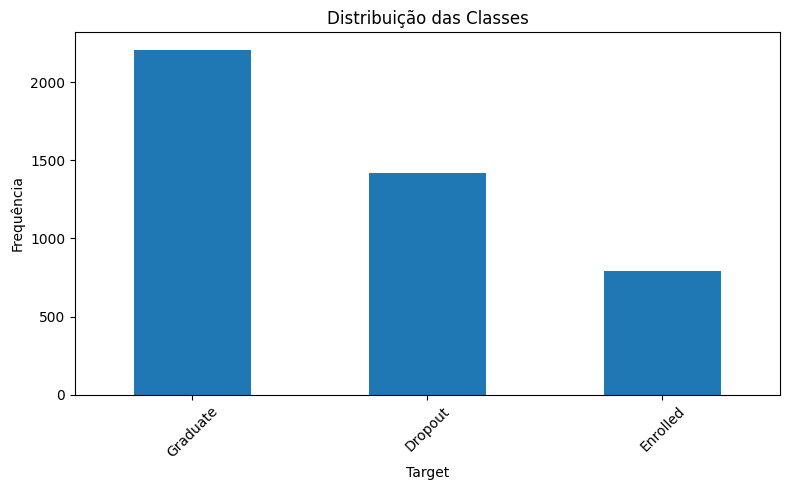

In [87]:
print("Distribuição da variável target:")
print(df['Target'].value_counts())
print("\nProporção:")
print(df['Target'].value_counts(normalize=True))

plt.figure(figsize=(8, 5))
df['Target'].value_counts().plot(kind='bar')
plt.title('Distribuição das Classes')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Pré-processamento


In [88]:
categorical_features = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance\t',
    'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International'
]

existing_categorical = [col for col in categorical_features if col in df.columns]
numerical_features = [col for col in df.columns if col not in existing_categorical and col != 'Target']

print(f"Variáveis categóricas encontradas: {len(existing_categorical)}")
print(f"Variáveis numéricas: {len(numerical_features)}")


Variáveis categóricas encontradas: 17
Variáveis numéricas: 19


In [89]:
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(df['Target'])
X = df.drop('Target', axis=1)

target_mapping = dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))
print("Mapeamento do target:")
for original, encoded in target_mapping.items():
    print(f"{original} -> {encoded}")

print(f"\nFormato: X={X.shape}, y={y.shape}")


Mapeamento do target:
Dropout -> 0
Enrolled -> 1
Graduate -> 2

Formato: X=(4424, 36), y=(4424,)


In [90]:
X_processed = X.copy()

for col in existing_categorical:
    if col in X_processed.columns:
        unique_count = X_processed[col].nunique()
        print(f"{col}: {unique_count} valores únicos", end=" ")
        
        if unique_count <= 10:  
            dummies = pd.get_dummies(X_processed[col], prefix=col, drop_first=True)
            X_processed = X_processed.drop(col, axis=1)
            X_processed = pd.concat([X_processed, dummies], axis=1)
            print("-> One-Hot Encoding")
        else:  
            le = LabelEncoder()
            X_processed[col] = le.fit_transform(X_processed[col])
            print("-> Label Encoding")

print(f"\nFormato após codificação: {X_processed.shape}")


Marital status: 6 valores únicos -> One-Hot Encoding
Application mode: 18 valores únicos -> Label Encoding
Course: 17 valores únicos -> Label Encoding
Daytime/evening attendance	: 2 valores únicos -> One-Hot Encoding
Previous qualification: 17 valores únicos -> Label Encoding
Nacionality: 21 valores únicos -> Label Encoding
Mother's qualification: 29 valores únicos -> Label Encoding
Father's qualification: 34 valores únicos -> Label Encoding
Mother's occupation: 32 valores únicos -> Label Encoding
Father's occupation: 46 valores únicos -> Label Encoding
Displaced: 2 valores únicos -> One-Hot Encoding
Educational special needs: 2 valores únicos -> One-Hot Encoding
Debtor: 2 valores únicos -> One-Hot Encoding
Tuition fees up to date: 2 valores únicos -> One-Hot Encoding
Gender: 2 valores únicos -> One-Hot Encoding
Scholarship holder: 2 valores únicos -> One-Hot Encoding
International: 2 valores únicos -> One-Hot Encoding

Formato após codificação: (4424, 40)


In [91]:
# Dividir em treino/teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y 
)

print(f"Divisão dos dados:")
print(f"Treinamento: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X_processed)*100:.1f}%)")
print(f"Teste: {X_test.shape[0]} amostras ({X_test.shape[0]/len(X_processed)*100:.1f}%)")
print(f"Features: {X_train.shape[1]}")

print(f"\nDistribuição - Treino: {dict(pd.Series(y_train).value_counts().sort_index())}")
print(f"Distribuição - Teste: {dict(pd.Series(y_test).value_counts().sort_index())}")


Divisão dos dados:
Treinamento: 3539 amostras (80.0%)
Teste: 885 amostras (20.0%)
Features: 40

Distribuição - Treino: {0: np.int64(1137), 1: np.int64(635), 2: np.int64(1767)}
Distribuição - Teste: {0: np.int64(284), 1: np.int64(159), 2: np.int64(442)}


In [92]:
# Normalização com StandardScaler
numerical_cols = [col for col in numerical_features if col in X_processed.columns]

print(f"Variáveis numéricas para normalização: {len(numerical_cols)}")

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

if numerical_cols:
    X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])
    print(f"{len(numerical_cols)} variáveis normalizadas")
    
    # Verificar normalização (média ≈ 0, std ≈ 1)
    print(f"\nVerificação da normalização (primeira variável numérica):")
    first_num_col = numerical_cols[0]
    print(f"{first_num_col}: média={X_train_scaled[first_num_col].mean():.3f}, std={X_train_scaled[first_num_col].std():.3f}")


Variáveis numéricas para normalização: 19
19 variáveis normalizadas

Verificação da normalização (primeira variável numérica):
Application order: média=-0.000, std=1.000


### Exportação para CSV


In [93]:
train_data = X_train_scaled.copy()
train_data['Target'] = y_train

test_data = X_test_scaled.copy()
test_data['Target'] = y_test

train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

print(f"train.csv: {train_data.shape}")
print(f"test.csv: {test_data.shape}")
print(f"Target: 0=Dropout, 1=Enrolled, 2=Graduate")


train.csv: (3539, 41)
test.csv: (885, 41)
Target: 0=Dropout, 1=Enrolled, 2=Graduate


P/ carregar dados processados:
```python
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Separar features e target
X_train = train_df.drop('Target', axis=1)
y_train = train_df['Target']
X_test = test_df.drop('Target', axis=1)
y_test = test_df['Target']
```